Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


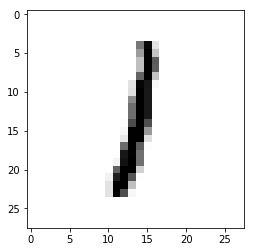

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

plt.imshow(mnist.train.images[4].reshape(28, 28), cmap="Greys")


In [2]:
mnist.train.labels[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# Network parameters:
n_input = 784               # One node for each pixel -> 28*28=784
hidden_layer_neurons = 300  # Number of hidden neurons
n_classes = 10              # Number of possible classes

# Training parameters:
learning_rate = 0.005
training_epochs = 30000
batch_size = 50

# Initializing tensorflow variables and models

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# CREATING WEIGHT AND BIASES FOR THE NETWORK

# Weights from input to hidden layer
w1 = tf.Variable(tf.random_normal([n_input, hidden_layer_neurons]))
# Weights from hidden to output layer
w2 = tf.Variable(tf.random_normal([hidden_layer_neurons, n_classes]))

# Biases for hidden neurons
b1=tf.Variable(tf.random_normal([hidden_layer_neurons]))
# Biases for output neurons
b2=tf.Variable(tf.random_normal([n_classes]))

# MULTILAYER PERCEPTRON MODEL

# For each hidden neuron apply sigm(wx + b)
hidden_layer=tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1))

# For each output neuron apply sigm(wx + b) on the output of the prev. layer
output_layer=tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer, w2), b2))

# Cost function and optimizer
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Define the Test model and accuracy
correct_prediction=tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
correct_prediction=tf.cast(correct_prediction, "float")
accuracy=tf.reduce_mean(correct_prediction)

# TENSORFLOW SESSION
sess=tf.InteractiveSession()

# Initialize Variables
init=tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [11]:
# Accuracies arrays to create a plot
train_accuracies = []
validation_accuracies = []
epoc_iteration = []

# Run the session, save accuracies
for epoch in range(training_epochs):
    batch_x, batch_y = mnist.train.next_batch(batch_size)

    if ((epoch+1) < 100 or (epoch+1) % 100) == 0:
        train_ac = accuracy.eval({x: batch_x, y: batch_y})
        validation_ac = accuracy.eval({x: mnist.validation.images, y: mnist.validation.labels})

        epoc_iteration.append(epoch+1)
        train_accuracies.append(train_ac)
        validation_accuracies.append(validation_ac)

    sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable)]]
	 [[Node: Mean/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_261_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Variable/read', defined at:
  File "c:\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "c:\python36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "c:\python36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "c:\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\python36\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "c:\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f83eaab74094>", line 19, in <module>
    w1 = tf.Variable(tf.random_normal([n_input, hidden_layer_neurons]))
  File "c:\python36\lib\site-packages\tensorflow\python\ops\variables.py", line 235, in __init__
    constraint=constraint)
  File "c:\python36\lib\site-packages\tensorflow\python\ops\variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "c:\python36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "c:\python36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3795, in identity
    "Identity", input=input, name=name)
  File "c:\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "c:\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable
	 [[Node: Variable/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable)]]
	 [[Node: Mean/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_261_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
# Plot the training and validation accuracies
# Create black canvas

fig = plt.figure(figsize=(10, 7))
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.36, 0.25, 0.53, 0.5])

# Plot full graph

axes1.plot(epoc_iteration, train_accuracies, '-b', label='Training')
axes1.plot(epoc_iteration, validation_accuracies, '-g', label='Validation')
axes1.legend()
axes1.set_xlabel('Epoch')
axes1.set_ylabel('Accuracy')
axes1.set_title('Training and Validation accuracy')

# Plot zoom in graph
plt.ylim(max=1.001, ymin=0.95)
axes2.plot(epoc_iteration[198:], train_accuracies[198:], '-b', label='Training')
axes2.plot(epoc_iteration[198:], validation_accuracies[198:], '-g', label='Validation')
axes2.set_title('Zoom in')

# Print final accuracies
print("Validation accuracy: ", accuracy.eval(
    {x: mnist.validation.images, y: mnist.validation.labels}))
print("Test accuracy: ", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
